In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.mlab import griddata
from mpl_toolkits.basemap import Basemap
import numpy as np
import warnings
warnings.filterwarnings("ignore")
initfontsize=8
mpl.rc('axes', labelsize=initfontsize, titlesize=initfontsize)
mpl.rc('xtick', labelsize=initfontsize)
mpl.rc('ytick', labelsize=initfontsize)
mpl.rc('legend', fontsize=initfontsize)
mpl.rc('savefig', dpi=300, transparent=False)
mpl.rc('font', size=initfontsize)
pointalpha=0.85
print('matplotlib '+str(mpl.__version__))
print('numpy '+str(np.__version__))

matplotlib 2.2.2
numpy 1.14.5


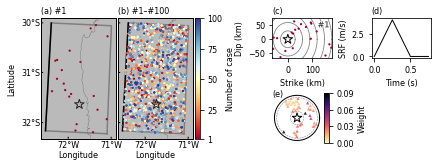

In [2]:
mpl.rc('font', size=initfontsize)
def draw_basemap(m, ax, ylabel):
    m.drawmapboundary(fill_color='#bababa')
    m.drawparallels(np.arange(-80.,81.,1),labels=[ylabel,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawcoastlines(color='C7', linewidth=0.5)
data=np.loadtxt('data/SynSourceMain/BP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt')
strike=(data[:,0]-32)*2.0; dip=(data[:,1]-34)*2.0; lat=data[:,2]
lon=data[:,3]; signal=data[:,4]; seed=data[:,5]
data=np.loadtxt('data/knot_value.dat_rim')
limlon, limlat=(data[:,1], data[:,0])
limlontop, limlattop=(data[2:4,1], data[2:4,0])
data=np.loadtxt('data/epicenter.dat')
elon, elat=(data[1], data[0])
w = 6.9; h = 6.9
fig=plt.figure(figsize=(w, h))
lonmin=min(limlon)-0.1; lonmax=max(limlon)+0.1; latmin=min(limlat)-0.1; latmax=max(limlat)+0.1
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
        rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.15; mapheight=mapwidth/aspect
#############################################################
ax1=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp1=ax1.get_position()
fig.text(axp1.x0, axp1.y1+0.005, '(a) #1', va='bottom', ha='left')
draw_basemap(m, ax1, 1)
ax1.set_xlabel('Longitude', labelpad=12)
ax1.set_ylabel('Latitude', labelpad=25)
x, y=m(limlon, limlat)
ax1.plot(x, y, color='C7', zorder=0)
x, y=m(limlontop, limlattop)
ax1.plot(x, y, color='k', zorder=0)
x, y=m(lon, lat)
sc=ax1.scatter(x[0:20], y[0:20], c=seed[0:20], s=5, cmap='RdYlBu', vmin=1, vmax=100, \
               edgecolor='none')
x, y=m(elon, elat)
ax1.scatter(x, y, s=100, marker='*', facecolor='none', edgecolor='k', alpha=0.8)
#############################################################
ax2=fig.add_axes([axp1.x1+0.005, axp1.y0, mapwidth, mapheight])
axp2=ax2.get_position()
fig.text(axp2.x0, axp2.y1+0.005, '(b) #1–#100', va='bottom', ha='left')
draw_basemap(m, ax2, 0)
ax2.set_yticklabels([])
ax2.set_xlabel('Longitude', labelpad=12)
x, y=m(limlon, limlat)
ax2.plot(x, y, color='C7', zorder=0)
x, y=m(limlontop, limlattop)
ax2.plot(x, y, color='k', zorder=0)
x, y=m(lon, lat)
sc=ax2.scatter(x, y, c=seed, s=5, cmap='RdYlBu', vmin=1, vmax=100, \
               edgecolor='none')
x, y=m(elon, elat)
ax2.scatter(x, y, s=100, marker='*', facecolor='none', edgecolor='k', alpha=0.8)
cbar_ax=fig.add_axes([axp2.x1+0.005, axp2.y0, 0.01, axp2.y1-axp2.y0])
cbar=plt.colorbar(sc, cax=cbar_ax, label = 'Number of case', ticks=[1, 25, 50, 75, 100])
#############################################################
ax3=fig.add_axes([axp2.x1+0.16,axp2.y0+(axp2.y1-axp2.y0)*2/3,0.12,(axp2.y1-axp2.y0)/3])
axp3=ax3.get_position()
fig.text(axp3.x0, axp2.y1+0.005, '(c)', va='bottom', ha='left')
ax3.set_xlim([-64, 180])
ax3.set_ylim([-68, 76])
ax3.set_xlabel('Strike (km)')
ax3.set_ylabel('Dip (km)')
ax3.scatter(0, 0, marker='*', facecolor='none', edgecolor='k', lw=1, s=100)
vr=3.0 #km/sec
timeint = 10 #sec
for i in np.arange(1, 8, 1):
    theta=np.arange(0, 360, 0.1)
    x=i * timeint * vr * np.cos(theta*np.pi/180)
    y=i * timeint * vr * np.sin(theta*np.pi/180)
    ax3.plot(x, y, color='C7', zorder=0, lw=0.8)
j=1
start = (j - 1)*20; end = j * 20
ax3.scatter(strike[start:end], dip[start:end], c=seed[start:end], s=5, \
            cmap='RdYlBu', vmin=1, vmax=100, edgecolor='none')
text=ax3.text(170, 68, '#'+str(j), va='top', ha='right', color='k', alpha=0.85)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
#############################################################
ax4=fig.add_axes([axp3.x1+0.08, axp3.y0, axp3.x1-axp3.x0, axp3.y1-axp3.y0])
axp4=ax4.get_position()
fig.text(axp4.x0, axp4.y1+0.005, '(d)', va='bottom', ha='left')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('SRF (m/s)')
data=np.loadtxt('data/SRF.txt')
t = data[:, 1]; amp = data[:, 0]*1e-2
ax4.plot(t, amp, color='k', lw=1)
#############################################################
ax5=fig.add_axes([axp3.x0, axp3.y0-0.17, 0.1, 0.1])
axp5=ax5.get_position()
fig.text(axp5.x0, axp5.y1-0.01, '(e)', va='bottom', ha='left')
def aziequi(ax, data):
    data = np.loadtxt(data)
    d, a, weight = (data[:, 0], 90-data[:,1], data[:,2])
    x, y=(d*np.cos(a*np.pi/180.0), d*np.sin(a*np.pi/180.0))

    sc=ax.scatter(x, y, s=10, marker='^', edgecolor='none', c=weight, alpha=0.85, vmin=0, vmax=0.09, cmap='magma_r')
    ax.scatter(0, 0, s=100, marker='*', edgecolor='k', facecolor='none')
    theta=np.linspace(0, 360, 360)
    for i in [30, 90]:
        x, y=(i*np.cos(theta*np.pi/180.0), i*np.sin(theta*np.pi/180.0))
        ax.plot(x, y, color='C7', zorder=0, solid_capstyle='round', lw=0.5, linestyle='--')
    x, y=(100*np.cos(theta*np.pi/180.0), 100*np.sin(theta*np.pi/180.0))
    ax.plot(x, y, color='k', solid_capstyle='round', lw=1)
    plt.axis('off')
    return sc
sc = aziequi(ax5, 'Data/weight_del20.txt')
cbar_ax=fig.add_axes([axp5.x1+0.005, axp5.y0, 0.01, axp5.y1-axp5.y0])
cbar=plt.colorbar(sc, cax=cbar_ax, label = 'Weight', ticks=np.arange(0, 1.0, 0.03))
#############################################################
plt.savefig("fig/model.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

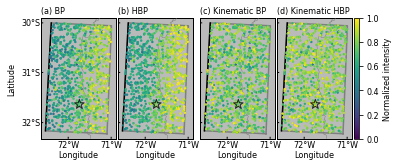

In [3]:
mpl.rc('font', size=8)
data=np.loadtxt('data/SynSourceMain/BP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt')
strike=(data[:,0]-32)*2.0; dip=(data[:,1]-34)*2.0; lat=data[:,2]
lon=data[:,3]; signal=data[:,4]; i=data[:,5]
data=np.loadtxt('data/knot_value.dat_rim')
limlon, limlat=(data[:,1], data[:,0])
limlontop, limlattop=(data[2:4,1], data[2:4,0])
data=np.loadtxt('data/epicenter.dat')
elon, elat=(data[1], data[0])
w = 6.9; h = 6.9
fig=plt.figure(figsize=(w, h))
lonmin=min(limlon)-0.1; lonmax=max(limlon)+0.1; latmin=min(limlat)-0.1; latmax=max(limlat)+0.1
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
        rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.15; mapheight=mapwidth/aspect
#############################################################
def DrawResultMap(ax, m, limlon, limlat, limlontop, limlattop, data, paraflag):
    data=np.loadtxt(data)
    strike=(data[:,0]-32)*2.0; dip=(data[:,1]-34)*2.0; lat=data[:,2]
    lon=data[:,3]; signal=data[:,4]; i=data[:,5]
    m.drawmapboundary(fill_color='#bababa', zorder=0)
    if paraflag == 1:
        m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
                        dashes=(2,10000), color='k')
        ax.set_ylabel('Latitude', labelpad=25)
    else:
        m.drawparallels(np.arange(-80.,81.,1),labels=[0,0,0,0], fontsize=initfontsize, \
                        dashes=(2,10000), color='k')
    m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawcoastlines(color='C7', linewidth=0.5)
    ax.set_xlabel('Longitude', labelpad=12)

    x, y=m(limlon, limlat)
    ax.plot(x, y, color='C7', zorder=1)
    x, y=m(limlontop, limlattop)
    ax.plot(x, y, color='k', zorder=1)

    x, y=m(lon, lat)
    sc=ax.scatter(x, y, c=signal, s=5, cmap='viridis', vmin=0, vmax=1, \
                   alpha=pointalpha, edgecolor='none', zorder=10)
    x, y=m(elon, elat)
    ax.scatter(x, y, s=100, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=100)
    return sc
#############################################################
ax1=fig.add_axes([0.15, 0.1, mapwidth, mapheight])
axp1=ax1.get_position()
fig.text(axp1.x0, axp1.y1+0.005, '(a) BP', va='bottom', ha='left')
sc = DrawResultMap(ax1, m, limlon, limlat, limlontop, limlattop, \
                   'data/SynSourceMain/BP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 1)
#############################################################
ax2=fig.add_axes([axp1.x1+0.005, axp1.y0, mapwidth, mapheight])
axp2=ax2.get_position()
fig.text(axp2.x0, axp2.y1+0.005, '(b) HBP', va='bottom', ha='left')
sc = DrawResultMap(ax2, m, limlon, limlat, limlontop, limlattop, \
                   'data/SynSourceMain/HBP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0)
#############################################################
ax3=fig.add_axes([axp2.x1+0.015, axp1.y0, mapwidth, mapheight])
axp3=ax3.get_position()
fig.text(axp3.x0, axp3.y1+0.005, '(c) Kinematic BP', va='bottom', ha='left')
sc = DrawResultMap(ax3, m, limlon, limlat, limlontop, limlattop, \
                   'data/SynSourceMain/BP1_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0)
#############################################################
ax4=fig.add_axes([axp3.x1+0.005, axp1.y0, mapwidth, mapheight])
axp4=ax4.get_position()
fig.text(axp4.x0, axp4.y1+0.005, '(d) Kinematic HBP', va='bottom', ha='left')
sc = DrawResultMap(ax4, m, limlon, limlat, limlontop, limlattop, \
                   'data/SynSourceMain/HBP1_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0)
#############################################################
axp=ax4.get_position()
cbar_ax=fig.add_axes([axp.x1+0.005, axp.y0, 0.01, axp.y1-axp.y0])
cbar=plt.colorbar(sc, cax=cbar_ax, label = 'Normalized intensity')
plt.savefig("fig/map.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

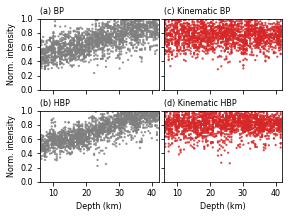

In [4]:
mpl.rc('font', size=8)
def DipSignalFig(ax, data, scflag, colorflag):
    data=np.loadtxt(data)
    strike=(data[:,0]-32)*2.0; dep=25.0-(data[:,1]-34)*2.0*np.sin(15.0*np.pi/180.0)
    dip = (data[:, 1] - 34)*2.0
    lat=data[:,2]; lon=data[:,3]; signal=data[:,4]; i=data[:,5]
    if scflag == 1:
        axp=ax.get_position()
    if colorflag == 0:
        facecolor='C7'
    else:
        facecolor='C3'
    sc=ax.scatter(dep,signal,facecolor=facecolor,s=5,alpha=pointalpha,edgecolors='none')
    ax.set_xlim([min(dep), max(dep)])
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_ylim([0,1])

fig=plt.figure(figsize=(6.9, 6.9))
ax1=fig.add_axes([0.2,0.6,0.5*(3.3/6.9),0.3*(3.3/6.9)])
axp1=ax1.get_position()
DipSignalFig(ax1, 'data/SynSourceMain/BP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0, 0)
ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.set_ylabel("Norm. intensity")

ax2=fig.add_axes([axp1.x1+0.01, axp1.y0, axp1.x1-axp1.x0, axp1.y1-axp1.y0])
axp2=ax2.get_position()
DipSignalFig(ax2, 'data/SynSourceMain/BP1_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0, 1)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3=fig.add_axes([axp1.x0, axp1.y0-0.185, axp1.x1-axp1.x0, axp1.y1-axp1.y0])
axp3=ax3.get_position()
DipSignalFig(ax3, 'data/SynSourceMain/HBP0_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 0, 0)
ax3.set_xlabel("Depth (km)")
ax3.set_ylabel("Norm. intensity")

ax4=fig.add_axes([axp2.x0, axp3.y0, axp1.x1-axp1.x0, axp1.y1-axp1.y0])
axp4=ax4.get_position()
DipSignalFig(ax4, 'data/SynSourceMain/HBP1_0.5_2.0_NthRoot1.0/signal_at_point_norm.all.txt', 1, 1)
ax4.set_yticklabels([])
ax4.set_xlabel("Depth (km)")

fig.text(axp1.x0, axp1.y1+0.005, '(a) BP', ha='left', va='bottom')
fig.text(axp2.x0, axp2.y1+0.005, '(c) Kinematic BP', ha='left', va='bottom')
fig.text(axp3.x0, axp3.y1+0.005, '(b) HBP', ha='left', va='bottom')
fig.text(axp4.x0, axp4.y1+0.005, '(d) Kinematic HBP', ha='left', va='bottom')

plt.savefig("fig/depth.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

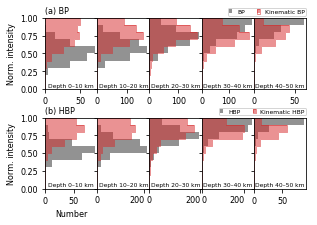

In [5]:
mpl.rc('font', size=initfontsize)
def SignalHistDepth(ax, datapath1, datapath2, label1, label2, flag):
    axp=ax.get_position()
    bins=np.linspace(0,1,11)
    histsum=0
    for i in np.arange(1, 6, 1):
        if i >= 2:
            axp=ax.get_position()
            ax=fig.add_axes([axp.x1, axp.y0, axp.x1-axp.x0, axp.y1-axp.y0])
        data=np.loadtxt(datapath1+'/fort.'+str(i*10+1000))
        signal=data[:, 1]
        ori = ax.hist(signal,bins=bins,orientation='horizontal',alpha=0.85,color='C7',normed=False, label=label1, histtype='bar')
        hist=np.histogram(signal, bins=bins, normed=False)
        max1=max(hist[0])
        histsum = histsum + len(data)
        y=np.linspace(0.05, 0.95, len(hist[0]))
        
        data=np.loadtxt(datapath2+'/fort.'+str(i*10+1000))
        signal=data[:,1]
        pot = ax.hist(signal,bins=bins,orientation='horizontal',alpha=0.5,color='C3',normed=False, label=label2, histtype='bar')
        frame = ax.hist(signal,bins=bins,orientation='horizontal',color='C3',normed=False, histtype='step', lw=0.5)
        hist=np.histogram(signal, bins=bins, normed=False)
        max2=max(hist[0])
    
        ax.set_ylim([0,1])
        axp=ax.get_position()
        if i == 1:
            ax.set_ylabel('Norm. intensity')
            fig.text(axp.x0+(axp.x1-axp.x0)/2, axp.y0+0.005, 'Depth 0–10 km', ha='center', va='bottom', size=6)
        else:
            fig.text(axp.x0+(axp.x1-axp.x0)/2, axp.y0+0.005, 'Depth '+str(i*10-10)+'–'+str(i*10)+' km', ha='center', va='bottom', size=6)
            ax.set_yticklabels([])
        if i == 5:
            legend=plt.legend(ncol=2, borderpad=0.2, bbox_to_anchor=(1.05, 1.18), loc=1, fontsize=6, handlelength=0.5)
            if flag == 0:
                ax.add_patch(patches.Rectangle((4, 1.057), 3.75, 0.06, fc='none', ec='C3', lw=0.5, zorder=10, clip_on=False))            
            else:
                ax.add_patch(patches.Rectangle((-2.4, 1.057), 5.7, 0.06, fc='none', ec='C3', lw=0.5, zorder=10, clip_on=False))
        
        if flag == 1:
            if i == 2 or i == 3:
                ax.text(200, -0.185, '200', ha='right')
                ax.text(0, -0.185, '0', ha='center')
                ax.set_xticklabels([])
            elif i == 4:
                ax.text(200, -0.185, '200', ha='right')
                ax.text(0, -0.185, '0', ha='left')
                ax.set_xticklabels([])

w = 3.3; h = 3.3
fig=plt.figure(figsize=(w, h))

ax1=fig.add_axes([0.15,0.6,0.22,0.3])
axp1=ax1.get_position()
fig.text(axp1.x0, axp1.y1+0.01, '(a) BP', ha='left', va='bottom')
SignalHistDepth(ax1, 'data/SynSourceMain/BP0_0.5_2.0_NthRoot1.0/', 'data/SynSourceMain/BP1_0.5_2.0_NthRoot1.0/', 'BP', 'Kinematic BP', 0)

ax2=fig.add_axes([axp1.x0, axp1.y0-(axp1.y1-axp1.y0)-0.25*(3.3/6.9), axp1.x1-axp1.x0, axp1.y1-axp1.y0])
axp2=ax2.get_position()
fig.text(axp2.x0, axp2.y1+0.01, '(b) HBP', ha='left', va='bottom')
SignalHistDepth(ax2, 'data/SynSourceMain/HBP0_0.5_2.0_NthRoot1.0/', 'data/SynSourceMain/HBP1_0.5_2.0_NthRoot1.0/', 'HBP', 'Kinematic HBP', 1)
ax2.set_xlabel('Number')

plt.savefig("fig/hist.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

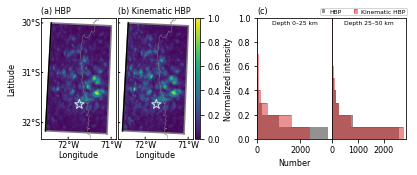

In [6]:
mpl.rc('font', size=initfontsize)

data=np.loadtxt('data/knot_value.dat_rim')
limlon, limlat=(data[:,1], data[:,0])
limlontop, limlattop=(data[2:4,1], data[2:4,0])
data=np.loadtxt('data/epicenter.dat')
elon, elat=(data[1], data[0])
w = 6.9; h = 6.9
fig=plt.figure(figsize=(w, h))
lonmin=min(limlon)-0.1; lonmax=max(limlon)+0.1; latmin=min(limlat)-0.1; latmax=max(limlat)+0.1
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
        rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.15; mapheight=mapwidth/aspect
#############################################################
ax1=fig.add_axes([0.15, 0.1, mapwidth, mapheight])
axp1=ax1.get_position()
fig.text(axp1.x0, axp1.y1+0.005, '(a) HBP', va='bottom', ha='left')
data = np.loadtxt('data/fort.301_r2HBPreal', usecols = (2,3,4))
y = data[:,0]; x = data[:,1]; z = data[:,2]
N = 1000j
extent = (lonmin, lonmax, latmin, latmax)
xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]
resampled = griddata(x, y, z, xs, ys,'linear')
sc=m.imshow(resampled.T, extent=extent, origin="lower", cmap = 'viridis', vmin = 0, vmax = 1)
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
                dashes=(2,10000), color='k')
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
                dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5)
ax1.set_xlabel('Longitude', labelpad=12)
ax1.set_ylabel('Latitude', labelpad=25)
x, y=m(limlon, limlat)
ax1.plot(x, y, color='C7', zorder=11)
x, y=m(limlontop, limlattop)
ax1.plot(x, y, color='k', zorder=12)
x, y=m(elon, elat)
ax1.scatter(x, y, s=100, marker='*', facecolor='none', edgecolor='w', alpha=0.8)
#############################################################
ax2=fig.add_axes([axp1.x1+0.005, axp1.y0, mapwidth, mapheight])
axp2=ax2.get_position()
fig.text(axp2.x0, axp2.y1+0.005, '(b) Kinematic HBP', va='bottom', ha='left')
data = np.loadtxt('data/fort.301_HBP_r3', usecols = (2,3,4))
y = data[:,0]; x = data[:,1]; z = data[:,2]
N = 1000j
extent = (lonmin, lonmax, latmin, latmax)
xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]
resampled = griddata(x, y, z, xs, ys,'linear')
m.drawparallels(np.arange(-80.,81.,1),labels=[0,0,0,0], fontsize=initfontsize, \
                dashes=(2,10000), color='k')
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
                dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5)
sc=m.imshow(resampled.T, extent=extent, origin="lower", cmap = 'viridis', vmin = 0, vmax = 1)
ax2.set_xlabel('Longitude', labelpad=12)
x, y=m(limlon, limlat)
ax2.plot(x, y, color='C7', zorder=11)
x, y=m(limlontop, limlattop)
ax2.plot(x, y, color='k', zorder=12)
x, y=m(elon, elat)
ax2.scatter(x, y, s=100, marker='*', facecolor='none', edgecolor='w', alpha=0.8)
cbar_ax=fig.add_axes([axp2.x1+0.005, axp2.y0, 0.01, axp2.y1-axp2.y0])
cbar=plt.colorbar(sc, cax=cbar_ax, label = 'Normalized intensity')
###################################################################
ax3=fig.add_axes([axp2.x1+0.13, axp2.y0, axp2.x1-axp2.x0, axp2.y1-axp2.y0])
axp3=ax3.get_position()
fig.text(axp3.x0, axp3.y1+0.005, '(c)', va='bottom', ha='left')
bins=np.linspace(0,1,11)
data=np.loadtxt('data/r2HBP_RealData/fort.2025'); signal=data[:,1]
ax3.hist(signal,bins=bins,orientation='horizontal',color='C7',normed=False, alpha=0.85, histtype='bar')

data=np.loadtxt('data/r3HBP_RealData/fort.2025'); signal=data[:,1]
ax3.hist(signal,bins=bins,orientation='horizontal',alpha=0.5,normed=False,color='C3', histtype='bar')
ax3.hist(signal,bins=bins,orientation='horizontal',normed=False,color='C3', histtype='step', lw=0.5)

ax3.set_ylim([0,1])
ax3.set_xlabel('Number')
axp3=ax3.get_position()
fig.text(axp3.x0+(axp3.x1-axp3.x0)/2, axp3.y1-0.005, 'Depth 0–25 km', ha='center', va='top', size=6)
###################################################################
ax4=fig.add_axes([axp3.x1, axp3.y0, axp3.x1-axp3.x0, axp3.y1-axp3.y0])
data=np.loadtxt('data/r2HBP_RealData/fort.2050'); signal=data[:,1]
ax4.hist(signal,bins=bins,orientation='horizontal',normed=False,color='C7', label='HBP', alpha=0.85, histtype='bar')

data=np.loadtxt('data/r3HBP_RealData/fort.2050'); signal=data[:,1]
ax4.hist(signal,bins=bins,orientation='horizontal',alpha=0.5,normed=False,color='C3', histtype='bar', label='Kinematic HBP')
ax4.hist(signal,bins=bins,orientation='horizontal',normed=False,color='C3', histtype='step', lw=0.5)
ax4.set_ylim([0,1])
ax4.set_yticks([])
axp4=ax4.get_position()
fig.text(axp4.x0+(axp4.x1-axp4.x0)/2, axp4.y1-0.005, 'Depth 25–50 km', ha='center', va='top', size=6)

legend=plt.legend(ncol=2, borderpad=0.2, bbox_to_anchor=(1.05, 1.11), loc=1, fontsize=6, handlelength=0.5)
ax4.add_patch(patches.Rectangle((850, 1.0375), 120, 0.035, fc='none', ec='C3', lw=0.5, zorder=10, clip_on=False))

plt.savefig("fig/real.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()